In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt 

#### Importo il dataset

In [3]:
dataset = pd.read_csv('datasets/bill_authentication.csv')
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### Divido il dataset in train e test

In [4]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Normalizzo i dati tramite standard scaler

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Addestro un modello con Random Forest Classifier

In [6]:
classifier = RandomForestClassifier(
    n_estimators=20, 
    random_state=42
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Eseguo una matrice di confusione per visualizzare dove il modello a sbagliato e quanto 

In [7]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


#### Mostro l'importanza nella classificazione di ogni features 

In [8]:
feature_list = dataset.columns[:-1]
print(list(feature_list))

importances = list(classifier.feature_importances_)
print(importances)

for t in zip(feature_list, importances):
    print(t)

feature_importances = [
    (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)
]

print("\n")

for t in feature_importances:
    print(t)

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

print(feature_importances)
print("\n")
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

['Variance', 'Skewness', 'Curtosis', 'Entropy']
[0.5525358370789158, 0.2317475702293396, 0.15579738510808866, 0.05991920758365586]
('Variance', 0.5525358370789158)
('Skewness', 0.2317475702293396)
('Curtosis', 0.15579738510808866)
('Entropy', 0.05991920758365586)


('Variance', 0.55)
('Skewness', 0.23)
('Curtosis', 0.16)
('Entropy', 0.06)
[('Variance', 0.55), ('Skewness', 0.23), ('Curtosis', 0.16), ('Entropy', 0.06)]


Variable: Variance             Importance: 0.55
Variable: Skewness             Importance: 0.23
Variable: Curtosis             Importance: 0.16
Variable: Entropy              Importance: 0.06


#### Illustrazione di importanza nella classificazione delle features

Text(0.5, 1.0, 'Variable Importances')

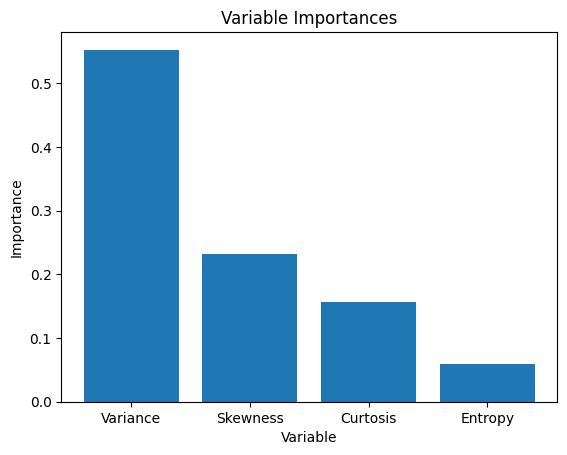

In [12]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances,)
plt.xticks(x_values, feature_list)

plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

#### Elimino la Entropy non essendo rilevante e rendere l'albero piu leggero

In [14]:
most_important = RandomForestClassifier(n_estimators= 1000, random_state=42)

important_indices = [
    dataset.columns.get_loc('Variance'),
    dataset.columns.get_loc('Skewness'),
    dataset.columns.get_loc('Curtosis'),
]
X_train_important = X_train[:, important_indices]
X_test_important = X_test[:, important_indices]

most_important.fit(X_train_important, y_train)

most_important_predictions = most_important.predict(X_test_important)

#### Le prestazioni del modello rimangono invariate

In [15]:
print(confusion_matrix(y_test,most_important_predictions))
print(classification_report(y_test,most_important_predictions))
print(accuracy_score(y_test, most_important_predictions))

[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455
